In [210]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.lines as mlines
import matplotlib.dates as mdates

In [197]:
file_paths = {
    'Trondheim': 'error/error_trondheim.csv',
    'Tromsø': 'error/error_tromsø.csv',
    'Stavanger': 'error//error_stavanger.csv',
    'Oslo': 'error/error_oslo.csv',
    'Helsingfors': 'error/error_helsingfors.csv',
    'Bergen': 'error/error_bergen.csv'
}

validation_paths = {
    'Trondheim': 'results3/validation_trondheim.csv',
    'Tromsø': 'results3/validation_tromsø.csv',
    'Stavanger': 'results3/validation_stavanger.csv',
    'Oslo': 'results3/validation_oslo.csv',
    'Helsingfors': 'results3/validation_helsingfors.csv',
    'Bergen': 'results3/validation_bergen.csv'
}

test_paths = {
    'Trondheim': 'results3/test_trondheim.csv',
    'Tromsø': 'results3/test_tromsø.csv',
    'Stavanger': 'results3/test_stavanger.csv',
    'Oslo': 'results3/test_oslo.csv',
    'Helsingfors': 'results3/test_helsingfors.csv',
    'Bergen': 'results3/test_bergen.csv'
}

In [198]:
# Create a dictionary to store the error data
error_data = {}

# Read each error CSV into a pandas DataFrame and store it in the dictionary
for city, file_path in file_paths.items():
    error_data[city] = pd.read_csv(file_path)

In [199]:
aneo_colors = ['#ffbb24', '#2f6cff', '#c7d7ff', '#ffe6a8', '#000000', '#3ed46f']

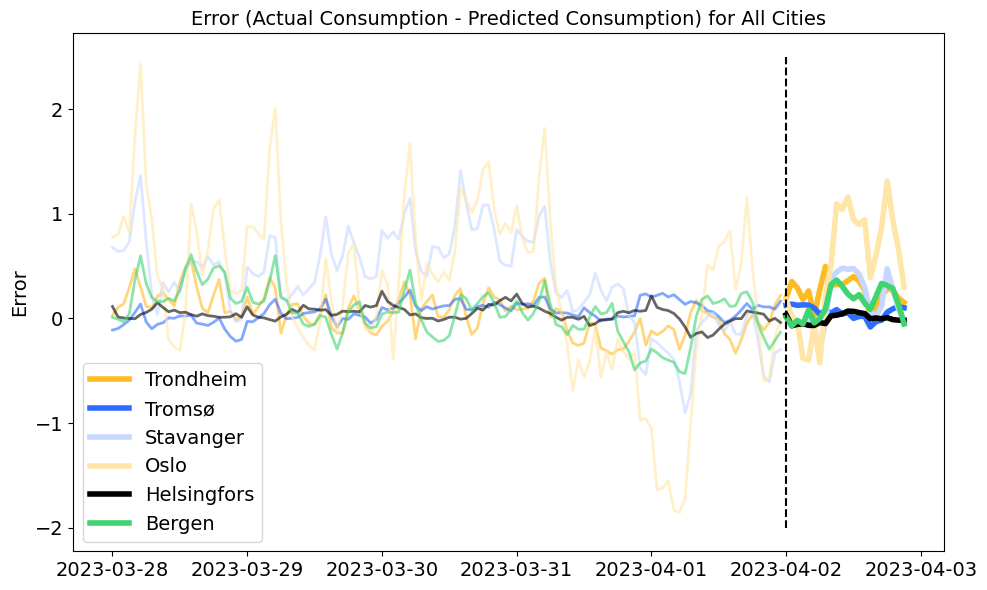

In [200]:
# Plotting all cities' errors on one line graph
plt.figure(figsize=(10, 6))

# Define the date to change color saturation
change_date = pd.to_datetime('2023-04-02')

legend_handles = []  # List to hold the legend handles

# Plot each city's error data
for (city, df), color in zip(error_data.items(), aneo_colors):
    df['time'] = pd.to_datetime(df['time'])
    
    # Data before the change_date
    before = df['time'] < change_date
    plt.plot(df['time'][before], df['error'][before], color=color, linewidth=2, alpha=0.6)
    
    # Data on or after the change_date
    on_or_after = df['time'] >= change_date
    plt.plot(df['time'][on_or_after], df['error'][on_or_after], color=color, linewidth=4, alpha=1)
    
    # Create a custom legend handle for this city
    legend_handles.append(mlines.Line2D([], [], color=color, linewidth=4, label=city))

# Finalizing the plot
plt.title('Error (Actual Consumption - Predicted Consumption) for All Cities', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(handles=legend_handles, fontsize=14)  # Use the custom legend handles here
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.vlines(x=change_date, ymin=-2 , ymax=2.5 , colors='black', linestyles='dashed')
plt.tight_layout()  # Adjust the layout

# Show the plot
plt.show()

In [201]:
validation_data = {}
test_data = {}
error_baseline = {}

for city, file_path in validation_paths.items():
    validation_data[city] = pd.read_csv(file_path).loc[120:141]


for city, file_path in test_paths.items():
    test_data[city] = pd.read_csv(file_path).loc[120:141]

    error_baseline[city] = (test_data[city]['consumption'] - validation_data[city]['consumption']).to_frame(name='error')
    
    
    time_range = pd.date_range(start="00:00", end="21:00", freq='H')
    error_baseline[city].set_index(keys=time_range, inplace=True)

    print(error_baseline[city].shape)
    print(error_baseline[city].head())

(22, 1)
                        error
2023-11-19 00:00:00  0.037166
2023-11-19 01:00:00  0.120373
2023-11-19 02:00:00  0.104756
2023-11-19 03:00:00  0.068518
2023-11-19 04:00:00 -0.106516
(22, 1)
                        error
2023-11-19 00:00:00  0.060227
2023-11-19 01:00:00  0.025370
2023-11-19 02:00:00 -0.020038
2023-11-19 03:00:00 -0.059411
2023-11-19 04:00:00 -0.181619
(22, 1)
                        error
2023-11-19 00:00:00 -0.318637
2023-11-19 01:00:00 -0.412673
2023-11-19 02:00:00 -0.445403
2023-11-19 03:00:00 -0.509695
2023-11-19 04:00:00 -0.886856
(22, 1)
                        error
2023-11-19 00:00:00 -0.670913
2023-11-19 01:00:00 -0.694150
2023-11-19 02:00:00 -0.810077
2023-11-19 03:00:00 -1.005085
2023-11-19 04:00:00 -2.014114
(22, 1)
                     error
2023-11-19 00:00:00 -0.017
2023-11-19 01:00:00 -0.015
2023-11-19 02:00:00 -0.015
2023-11-19 03:00:00 -0.012
2023-11-19 04:00:00 -0.011
(22, 1)
                        error
2023-11-19 00:00:00  0.092311
2023-11-19

In [202]:
for city in error_data.keys():
    error_data[city] = error_data[city].loc[120:141].drop(columns=['time'])
    
    time_range = pd.date_range(start="00:00", end="21:00", freq='H')
    error_data[city].set_index(keys=time_range, inplace=True)
    print(error_data[city].shape)
    print(error_data[city].head())

(22, 1)
                        error
2023-11-19 00:00:00  0.194651
2023-11-19 01:00:00  0.353467
2023-11-19 02:00:00  0.291014
2023-11-19 03:00:00  0.180457
2023-11-19 04:00:00  0.263177
(22, 1)
                        error
2023-11-19 00:00:00  0.126774
2023-11-19 01:00:00  0.137081
2023-11-19 02:00:00  0.126278
2023-11-19 03:00:00  0.130073
2023-11-19 04:00:00  0.127880
(22, 1)
                        error
2023-11-19 00:00:00  0.032071
2023-11-19 01:00:00 -0.046167
2023-11-19 02:00:00 -0.037197
2023-11-19 03:00:00 -0.060908
2023-11-19 04:00:00  0.010507
(22, 1)
                        error
2023-11-19 00:00:00  0.177052
2023-11-19 01:00:00  0.025248
2023-11-19 02:00:00 -0.038553
2023-11-19 03:00:00 -0.382898
2023-11-19 04:00:00 -0.397086
(22, 1)
                        error
2023-11-19 00:00:00  0.034877
2023-11-19 01:00:00 -0.069438
2023-11-19 02:00:00 -0.056438
2023-11-19 03:00:00 -0.049438
2023-11-19 04:00:00 -0.065438
(22, 1)
                        error
2023-11-19 00:00:00  0

In [247]:
# Calculate average error for each city in error_data
MAE_error_baseline = {city: abs(df['error']).mean() for city, df in error_baseline.items()}
SD_error_baseline = {city: df['error'].std() for city, df in error_baseline.items()}

# Calculate average error for each city in error_data
MAE_error_data = {city: abs(df['error']).mean() for city, df in error_data.items()}
SD_error_data = {city: df['error'].std() for city, df in error_data.items()}

# Assuming MAE_error_data and MAE_error_baseline are dictionaries with the same keys
MAE_difference = {city: MAE_error_data[city] - MAE_error_baseline[city] for city in MAE_error_data}

# Assuming SD_error_data and SD_error_baseline are dictionaries with the same keys
SD_difference = {city: SD_error_data[city] - SD_error_baseline[city] for city in SD_error_data}

# Now, create a DataFrame with the average errors
df_average_errors = pd.DataFrame({
    'City': average_error_baseline.keys(),
    'MAE Model': MAE_error_data.values(),
    'MAE Baseline': MAE_error_baseline.values(),
    'MAE Model-Baseline': MAE_difference.values(),
    'SD Model': SD_error_data.values(),
    'SD Baseline': SD_error_baseline.values(),
    'SD Model-Baseline': SD_difference.values()

    
})

# Set the City as the index of the DataFrame
df_average_errors.set_index('City', inplace=True)

df_average_errors


,MAE Model,MAE Baseline,MAE Model-Baseline,SD Model,SD Baseline,SD Model-Baseline
City,,,,,,
Trondheim,0.256598,0.301924,-0.045326,0.119155,0.274236,-0.155081
Tromsø,0.074459,0.089036,-0.014576,0.059138,0.120085,-0.060947
Stavanger,0.211300,0.404801,-0.193501,0.235476,0.541440,-0.305964
Oslo,0.609055,0.792388,-0.183334,0.541714,0.999605,-0.457891
Helsingfors,0.037954,0.065182,-0.027228,0.045466,0.036611,0.008856
Bergen,0.162698,0.217905,-0.055207,0.146094,0.216917,-0.070822


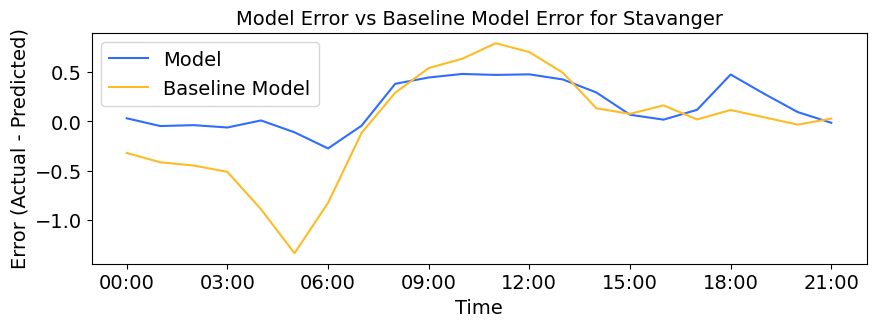

In [242]:


# Assuming 'error_data' and 'error_baseline' are dictionaries with city keys
# and their values are DataFrames with an 'error' column.

# Choose the city for which you want to plot the error data
city_to_plot = 'Stavanger'

plt.figure(figsize=(10, 3))

# Assuming 'error_data' is a dictionary with city keys and their values are DataFrames with an 'error' column.
# Plot error_data for the chosen city
plt.plot(error_data[city_to_plot].index, error_data[city_to_plot]['error'], label='Model', color='#2f6cff')

# Assuming 'error_baseline' is a dictionary with city keys and their values are Series.
# Plot error_baseline for the chosen city directly since it's a Series
plt.plot(error_baseline[city_to_plot].index, error_baseline[city_to_plot], label='Baseline Model', color='#ffbb24')

# Labeling the plot
plt.title(f'Model Error vs Baseline Model Error for {city_to_plot}', size=14)
plt.xlabel('Time', size=14)
plt.ylabel('Error (Actual - Predicted)', size=14)
plt.legend(fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
# Show the plot
plt.show()

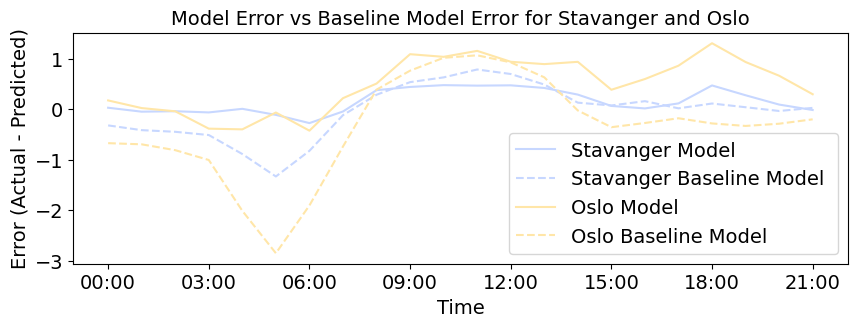

In [256]:
# Plotting error data and error baseline for all cities
plt.figure(figsize=(10, 3))
i=2

cities = ['Stavanger', 'Oslo']

for city in cities: 
    plt.plot(error_data[city].index, error_data[city]['error'], color=aneo_colors[i], label=f'{city} Model')
    plt.plot(error_baseline[city].index, error_baseline[city], color=aneo_colors[i], label=f'{city} Baseline Model ', linestyle='--', alpha =1)
    i=i+1

# Labeling the plot
plt.title('Model Error vs Baseline Model Error for Stavanger and Oslo', size=14)
plt.xlabel('Time', size=14)
plt.ylabel('Error (Actual - Predicted)', size=14)
plt.legend(fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.show()

In [234]:
# For error_baseline, assuming it's a dictionary of Series:
average_error_baseline = {city: errors.mean() for city, errors in error_baseline.items()}

# For error_data, assuming it's a dictionary of DataFrames with an 'error' column:
average_error_data = {city: df['error'].mean() for city, df in error_data.items()}


In [207]:
print("Average Error in Baseline:")
for city, avg_error in average_error_baseline.items():
    print(f"{city}: {avg_error}")

print("\nAverage Error in Data:")
for city, avg_error in average_error_data.items():
    print(f"{city}: {avg_error}")


Average Error in Baseline:
Trondheim: error    0.248727
dtype: float64
Tromsø: error    0.005924
dtype: float64
Stavanger: error   -0.038498
dtype: float64
Oslo: error   -0.353959
dtype: float64
Helsingfors: error   -0.065182
dtype: float64
Bergen: error    0.152462
dtype: float64

Average Error in Data:
Trondheim: 0.25636932876257074
Tromsø: 0.06294125105771152
Stavanger: 0.15838714472267856
Oslo: 0.49045674028431224
Helsingfors: -0.002491439992731323
Bergen: 0.1413617185733678


In [208]:
# Calculate average error for each city in error_baseline
average_error_baseline = {city: series.mean() for city, series in error_baseline.items()}

# Calculate average error for each city in error_data
average_error_data = {city: df['error'].mean() for city, df in error_data.items()}

# Now, create a DataFrame with the average errors
df_average_errors = pd.DataFrame({
    'City': average_error_baseline.keys(),
    'Average Error Baseline': average_error_baseline.values(),
    'Average Error Data': average_error_data.values()
})

# Set the City as the index of the DataFrame
df_average_errors.set_index('City', inplace=True)

df_average_errors


,Average Error Baseline,Average Error Data
City,,
Trondheim,error 0.248727 dtype: float64,0.256369
Tromsø,error 0.005924 dtype: float64,0.062941
Stavanger,error -0.038498 dtype: float64,0.158387
Oslo,error -0.353959 dtype: float64,0.490457
Helsingfors,error -0.065182 dtype: float64,-0.002491
Bergen,error 0.152462 dtype: float64,0.141362
